In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

In [140]:
# 1.  Відкрити та зчитати наданий файл з даними. 
df = pd.read_csv("dataset3_l5.csv", delimiter=';')
# 2.  Визначити та вивести кількість записів.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   object
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   object
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   object
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   object
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   object
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   object
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   object
 7   Age (day)                                              1030 non-null   int64 
 8   Concrete compressive strength(MPa, megapascals)        1030

In [141]:
# 3.  Видалити атрибут Concrete compressive strength
df = df.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)
# 4.  Вивести атрибути, що залишилися. 
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [142]:
def replace_comma(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

df = df.applymap(replace_comma)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


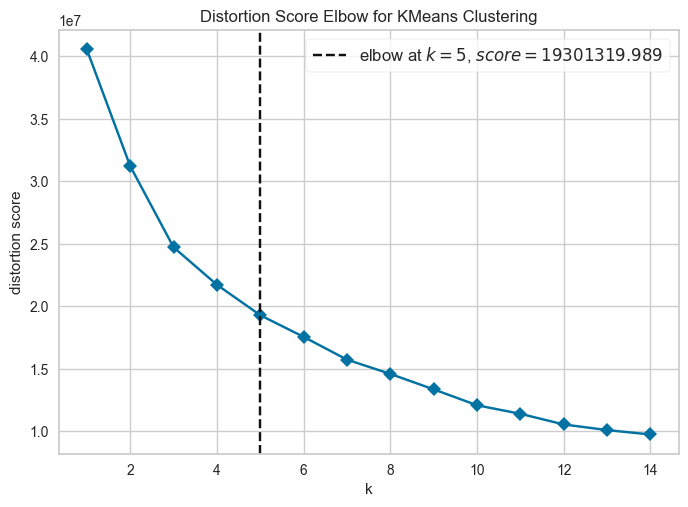

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
# 5.  Використовуючи функцію KMeans бібліотеки scikit-learn, виконати 
# розбиття набору даних на кластери з випадковою початковою 
# ініціалізацією і вивести координати центрів кластерів. 
# Оптимальну кількість кластерів визначити на основі початкового 
# набору даних трьома різними способами: 
#     1) elbow method; 
#     2) average silhouette method; 
#     3)  prediction  strength  method  (див.  п.  9.2.3  Determining  the  Number  of  
# Clusters  книжки  Andriy  Burkov.  The  Hundred-Page  Machine  Learning  
# Book). 

k = range(2, 16)
X = df.values

# 1) elbow method; 
model = KMeans(init='random', random_state=42)
visualizer = KElbowVisualizer(model, k=range(1, max(k)), timings=False)

visualizer.fit(X)
visualizer.show()

In [144]:
print(f"Координати центрів кластерів: {KMeans(n_clusters=5, init='random', random_state=42).fit(X).cluster_centers_}")

Координати центрів кластерів: [[2.17726129e+02 1.25193548e+01 1.10195161e+02 1.72109677e+02
  7.63774194e+00 1.02027194e+03 8.13602258e+02 3.84483871e+01]
 [3.74092925e+02 8.66580189e+01 4.09617925e+01 1.70245755e+02
  1.11561321e+01 8.89153302e+02 8.10534906e+02 3.12688679e+01]
 [3.36316667e+02 5.69958333e+01 2.13162821e-14 2.13770833e+02
  2.66453526e-15 9.61195833e+02 6.98029167e+02 2.80833333e+02]
 [1.97647080e+02 1.79038686e+02 3.95620438e+01 1.91109489e+02
  4.46824818e+00 9.52098905e+02 7.43199270e+02 3.19014599e+01]
 [3.89793548e+02 1.11172043e+01 1.14494624e+01 1.87866667e+02
  2.33172043e+00 1.02316774e+03 7.29009677e+02 3.36720430e+01]]


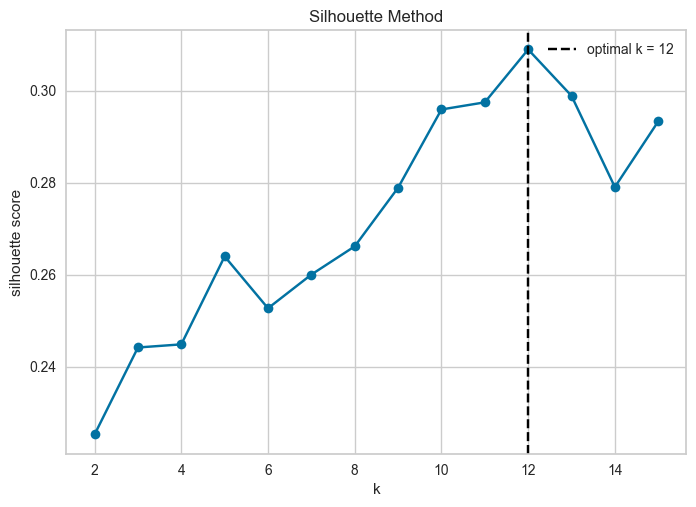

In [145]:
# Silhouette Method
silhouette_scores = []
for i in k:
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    silhouette_scores.append(silhouette_score(X, kmeans.fit_predict(X)))

optimal_k = k[silhouette_scores.index(max(silhouette_scores))]

plt.plot(k, silhouette_scores, marker='o')
plt.axvline(optimal_k, linestyle='--', color='black', label=f'optimal k = {optimal_k}')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Method')
plt.legend()

In [146]:
print(f"Координати центрів кластерів: {KMeans(n_clusters=12, init='random', random_state=42).fit(X).cluster_centers_}")

Координати центрів кластерів: [[4.44201754e+02 8.30526316e+01 4.97379915e-14 1.51289474e+02
  1.67087719e+01 8.69877193e+02 8.71307018e+02 3.55263158e+01]
 [1.93738835e+02 1.38902913e+02 1.19584466e+02 1.89667961e+02
  8.63495146e+00 9.06124272e+02 7.30443689e+02 2.97766990e+01]
 [4.89044737e+02 2.43421053e+01 3.13157895e+00 1.77855263e+02
  3.15526316e+00 1.11240263e+03 6.27089474e+02 5.97368421e+01]
 [3.17075000e+02 7.46750000e+01 2.13162821e-14 2.18333333e+02
  3.55271368e-15 9.47011111e+02 6.89400000e+02 3.06944444e+02]
 [3.39614286e+02 1.74596429e+02 3.55271368e-14 1.71998810e+02
  9.95476190e+00 9.25500000e+02 7.65489286e+02 3.42857143e+01]
 [2.34458667e+02 2.35137333e+02 1.42108547e-14 1.95225333e+02
  2.56000000e+00 9.86028000e+02 6.71796000e+02 3.31466667e+01]
 [3.46040625e+02 1.04062500e+01 1.16129687e+02 1.76378125e+02
  1.03234375e+01 8.94798437e+02 7.88500000e+02 2.53593750e+01]
 [2.31268750e+02 3.92857143e-01 9.25562500e+01 1.76325893e+02
  7.00625000e+00 9.61072321e+02 8

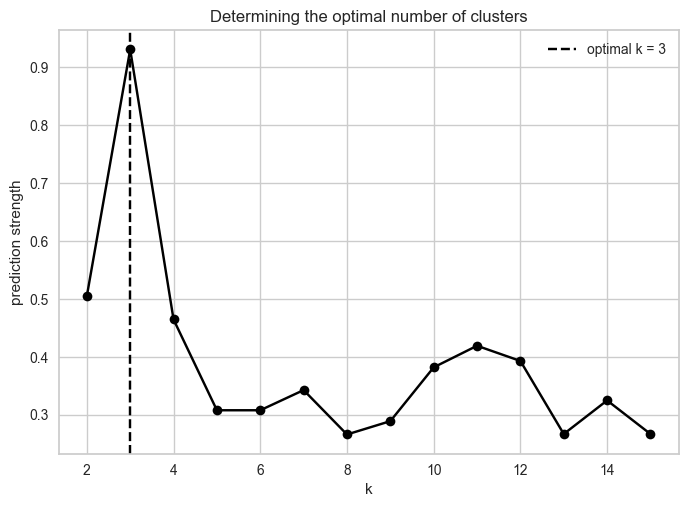

In [147]:
# 3)  prediction  strength  method 
x_train, x_test= train_test_split(X, test_size=0.2, shuffle=True, random_state=42)

def get_closest_centroid(obs, centroids):
    min_distance = float('inf')
    min_centroid = 0
    
    for c in centroids:
        dist = distance.euclidean(obs, c)
        if dist < min_distance:
            min_distance = dist
            min_centroid = c
            
    return min_centroid

def get_prediction_strength(k, train_centroids, x_test, test_labels):
    n_test = len(x_test)
    
    D = np.zeros(shape=(n_test, n_test))
    for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
        for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
            if tuple(x1) != tuple(x2):
                if tuple(get_closest_centroid(x1, train_centroids)) == tuple(get_closest_centroid(x2, train_centroids)):
                    D[c1,c2] = 1.0
    
    ss = []
    for j in range(k):
        s = 0
        examples_j = x_test[test_labels == j, :].tolist()
        n_examples_j = len(examples_j)
        for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
            for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
                if tuple(x1) != tuple(x2) and l1 == l2 and l1 == j:
                    s += D[c1,c2]
        ss.append(s / (n_examples_j * (n_examples_j - 1))) 

    prediction_strength = min(ss)

    return prediction_strength


strengths = []
for i in k:
    model_train = KMeans(n_clusters=i, init='random', random_state=42).fit(x_train)
    model_test = KMeans(n_clusters=i, init='random', random_state=42).fit(x_test)
    
    pred_str = get_prediction_strength(i, model_train.cluster_centers_, x_test, model_test.labels_)
    strengths.append(pred_str)

optimal_k = k[strengths.index(max(strengths))]
plt.plot(k, strengths, '-o', color='black')
plt.axvline(optimal_k, linestyle='--', color='black', label=f'optimal k = {optimal_k}')
plt.title('Determining the optimal number of clusters')
plt.xlabel('k') 
plt.ylabel('prediction strength')
plt.legend()

In [148]:
print(f"Координати центрів кластерів: {KMeans(n_clusters=3, init='random', random_state=42).fit(X).cluster_centers_}")

Координати центрів кластерів: [[ 224.79884058   11.42318841  101.92492754  173.62231884    7.02
  1016.41275362  814.60173913   39.06376812]
 [ 223.59114286  176.59542857   34.078       188.33628571    5.35057143
   943.35285714  748.06171429   39.68285714]
 [ 399.37432836   30.93522388   26.03761194  182.67731343    6.25731343
   959.01671642  757.9961194    58.70447761]]


In [149]:
# 6. За раніш обраної кількості кластерів багаторазово проведіть 
# кластеризацію методом k-середніх, використовуючи для початкової 
# ініціалізації метод k-means++. 
# Виберіть  найкращий  варіант  кластеризації.  Який  кількісний  критерій 
# Ви обрали для відбору найкращої кластеризації?

k = 4
num_repeats = 20
inertias = []
for _ in range(num_repeats):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    inertias.append(silhouette_score(X, kmeans.fit_predict(X)))


print(f"Найкращий варінт кластерізації: {silhouette_scores.index(max(silhouette_scores))}")

Найкращий варінт кластерізації: 10


In [150]:
# Використовуючи функцію AgglomerativeClustering бібліотеки scikit-
# learn, виконати розбиття набору даних на кластери. Кількість кластерів 
# обрати такою ж самою, як і в попередньому методі. Вивести 
# координати центрів кластерів
agg_clustering = AgglomerativeClustering(n_clusters=k)
labels = agg_clustering.fit_predict(X)
centers = [X[labels == i].mean(axis=0) for i in range(k)]

centers

[array([ 265.12186235,   10.52408907,   79.1048583 ,  177.401417  ,
           5.90728745, 1008.31437247,  803.88036437,   36.96963563]),
 array([200.26818182, 172.5486014 ,  46.62657343, 188.76923077,
          5.18811189, 947.67762238, 748.64825175,  30.61888112]),
 array([415.35078125,  40.67421875,  26.5703125 , 199.8828125 ,
          2.49140625, 969.5265625 , 670.70546875, 123.140625  ]),
 array([395.00901639, 134.08688525,   0.        , 162.33606557,
         13.68770492, 892.32786885, 817.27295082,  34.83606557])]